<a href="https://colab.research.google.com/github/sana-hds/HDS-assignmenet/blob/main/week12/week12_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [85]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('data/condemn.txt')
condemnations.shape

<ipython-input-85-bbf5a9bab8ca>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('data/condemn.txt')


(32586, 40)

In [86]:
# Convert InspectDate to datetime format
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

In [87]:
# Filter the data for the years 1986 to 2014
condemnations = condemnations[(condemnations['InspectDate'].dt.year >= 1986) & (condemnations['InspectDate'].dt.year <= 2014)]

# Display the shape of the filtered dataframe
print(condemnations.shape)

(30232, 40)


In [88]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [89]:
import pandas as pd
import numpy as np

# Extract the year from the InspectDate column
condemnations['Year'] = condemnations['InspectDate'].dt.year

# Create the pivot table
by_year = condemnations.pivot_table(
    index='Year',
    columns='Status',
    values='InspectDate',
    aggfunc='size'
)

print(by_year)

Status       B      L     R      W
Year                              
1986      22.0   12.0  19.0  112.0
1987      91.0   20.0   8.0  361.0
1988     215.0   16.0  15.0  297.0
1989     277.0   15.0  11.0  432.0
1990     119.0   29.0   8.0  322.0
1991     139.0   18.0   4.0  351.0
1992     204.0   30.0   4.0  258.0
1993     185.0   47.0   2.0  193.0
1994     208.0   94.0   5.0  293.0
1995     176.0  127.0   NaN  268.0
1996     214.0  171.0   NaN  794.0
1997     281.0  328.0   NaN  878.0
1998     254.0  343.0   NaN  599.0
1999     272.0  283.0   NaN  826.0
2000     320.0  268.0   NaN  529.0
2001     381.0  262.0   NaN  296.0
2002     383.0  227.0   NaN  317.0
2003     361.0  201.0   NaN  282.0
2004     354.0  204.0   NaN  381.0
2005     410.0  237.0   NaN  345.0
2006     479.0  233.0  20.0  370.0
2007     613.0  262.0   NaN  341.0
2008     700.0  254.0   NaN  334.0
2009     785.0  223.0   NaN  200.0
2010    1161.0  193.0   NaN  154.0
2011    1028.0  275.0   NaN  107.0
2012     738.0  257.

In [90]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

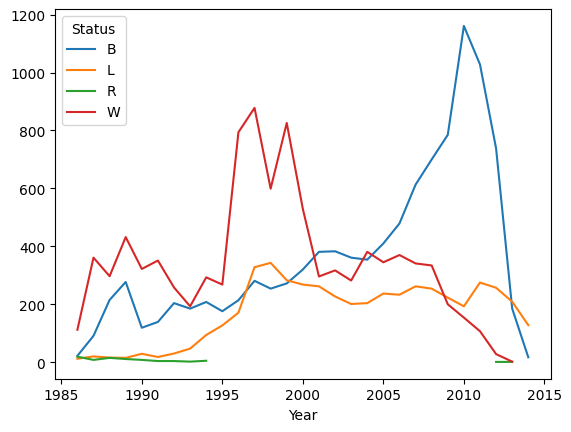

In [91]:
%matplotlib inline
by_year.plot()

Observations:

---

‘B’ Status: Shows significant fluctuations with a peak around 2010.

‘L’ Status: Generally trends downward over the years.

‘R’ Status: Remains relatively flat until around 2005, then increases sharply.

‘W’ Status: Shows an overall increasing trend with some fluctuations.

These trends can help identify periods of significant changes in condemnation statuses, which might warrant further investigation into underlying causes or implications.---

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `/data/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [92]:
import pandas as pd

meetings = pd.read_csv('data/meetings.csv')

In [93]:
meetings['startDate'] = meetings['startTime'].str[0:10]

In [94]:
meetings['Period'] = 'OTHER'
meetings.loc[(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28'), 'Period'] = 'BEFORE'
meetings.loc[(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27'), 'Period'] = 'DURING'

In [95]:
filtered_meetings = meetings[meetings['Period'].isin(['BEFORE', 'DURING'])]

In [96]:

summary = filtered_meetings.pivot_table(index='userName', columns='Period', values='meetingId', aggfunc='count', fill_value=0)
summary.columns = ['Before', 'During']

In [97]:
summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before'])
summary['pctChange'] = summary['pctChange'].fillna(0)  # Handle division by zero

In [98]:
summary.reset_index(inplace=True)
print(summary)

                          userName  Before  During  pctChange
0                       Drew.Marco      12      19   0.583333
1                      amit.bhagat      17      30   0.764706
2   andrea.bryant.amitechsolutions       5       3  -0.400000
3                     angie.warren       5       9   0.800000
4    chris.rogers.amitechsolutions       4       3  -0.250000
5                      eric.keeney      15      27   0.800000
6                      eric.rodman       4      12   2.000000
7   jeff.hatfield.amitechsolutions      13      26   1.000000
8         jennifer.patton.amitechs       5       7   0.400000
9                   jessica.sikora       3       7   1.333333
10                     matt.allsup       5       0  -1.000000
11     matt.brown.amitechsolutions       1       2   1.000000
12                   melissa.menne      10       9  -0.100000
13                   michael.demos       5      11   1.200000
14                       paul.boal      15      35   1.333333
15     p

In [99]:
assert(len(summary) == 22)

In [100]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
